## 2.1 퍼셉트론이란?
- 인공뉴런 혹은 단순 퍼셉트론이라고 불림
- 다수의 신호를 입력 받아 하나의 신호로 출력
- 퍼셉트론 신호는 두가지 값만 가짐: 1 or 0


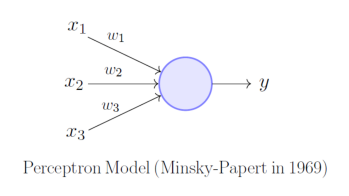

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
import requests
url = "https://miro.medium.com/max/806/0*LJBO8UbtzK_SKMog"

im = Image.open(requests.get(url, stream=True).raw)
plt.imshow(im)
plt.axis('off')
plt.show()

- x: 입력신호
- w: 가중치
- $\theta$: 임계값
- y: 출력값

■ 뉴런에서 보내온 신호의 총합이 정해진 한계(임계값)를 넘어설 때만 1을 출력<br>
■ 가중치가 클 수록 해당신호가 그만큼 더 중요

퍼셉트론 동작 원리의 수식:<br>

$$y=\begin{cases} 0 & (w_1 x_1 + w_2 x_2 \le \theta) \\ 1 & (w_1 x_1 + w_2 x_2 > \theta) \end{cases}$$

## 2.3 퍼셉트론 구현하기

In [18]:
def AND(x1,x2):
    w1,w2,theta = 0.2,0.2,0.3
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [19]:
print(AND(0,0))#0
print(AND(0,1))#0
print(AND(1,0))#0
print(AND(1,1))#1

0
0
0
1


## 2.3.2 가중치와 편향 도입

$$y=\begin{cases} 0 & (b + w_1 x_1 + w_2 x_2 \le 0) \\ 1 & (b + w_1 x_1 + w_2 x_2 > 0) \end{cases}$$

- b: 편향

In [22]:
#가중치와 편향을 도입한 AND 게이트
def AND(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.2,0.2])
    b = -0.3
    tmp = np.sum(x*w)+b
    if tmp <= 0:
        return 0
    else:
        return 1

In [23]:
print(AND(0,0))#0
print(AND(0,1))#0
print(AND(1,0))#0
print(AND(1,1))#1

0
0
0
1


편향 $\neq$ 가중치:
- 가중치(w): 입력 신호가 결과에 주는 영향력(중요도)을 조절하는 매개변수
- 편향(b): 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐를 조정하는 매개변수<br>$   \longrightarrow$두 입력이 모두 0이어도 결과로 (0이 아닌) 편향 값을 출력

In [24]:
#NAND 게이트
def NAND(x1, x2):
    x = np.array([x1,x2]) 
    w = np.array([-0.2,-0.2])
    b = 0.3
    tmp = np.sum(x*w)+b
    if tmp <= 0:
        return 0
    else:
        return 1

In [25]:
print(NAND(0,0))#1
print(NAND(0,1))#1
print(NAND(1,0))#1
print(NAND(1,1))#0

1
1
1
0


In [26]:
#OR 게이트
def OR(x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.2,0.2])
    b = -0.1
    tmp = np.sum(x*w)+b
    if tmp<=0:
        return 0
    else:
        return 1

In [28]:
print(OR(0,0))#0
print(OR(0,1))#1
print(OR(1,0))#1
print(OR(1,1))#1

0
1
1
1


## 2.5 다중 퍼셉트론
- XOR 게이트
- 비선형 영역도 표현 가능

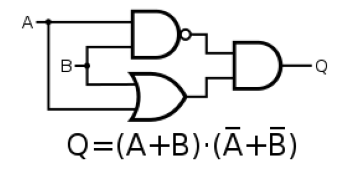

In [16]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
import requests
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/3_gate_XOR.svg/270px-3_gate_XOR.svg.png"

im = Image.open(requests.get(url, stream=True).raw)
plt.imshow(im)
plt.axis('off')
plt.show()

## 2.5.2 XOR 게이트 구현하기

In [37]:
def XOR(x1,x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

In [38]:
XOR(0,0)#0

0

In [39]:
XOR(0,1)#1

1

In [40]:
XOR(1,0)#1

1

In [41]:
XOR(1,1)#0

0

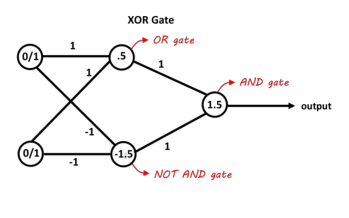

In [17]:
url = "https://i.stack.imgur.com/IAaJG.png"

im = Image.open(requests.get(url, stream=True).raw)
plt.imshow(im)
plt.axis('off')
plt.show()

- XOR은 2층 퍼셉트론
***단층 퍼셉트론으로는 표현하지 못한 것을 층을 하나 늘려 구현**
- 다층 퍼셉트론은 (이론상) 컴퓨터를 표현할 수 있다